In [7]:
# !pip install -U scikit-learn
# !python -m pip install --upgrade pip
# !pip install matplotlib
# !python -m pip install seaborn
# !pip install openpyxl
# !python -m pip install prophet
# !pip install --upgrade plotly

In [8]:
import numpy as np  
import pandas as pd 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.preprocessing import MinMaxScaler
from prophet.plot import add_changepoints_to_plot

In [9]:
# %ls

In [10]:
df = pd.read_excel('weather data.xlsx')

In [11]:
df.head()

,Year,Monthy,Day,Temperature Max,Temperature Min,Precipitation,Humidity,Wind Speed Max,Wind Speed Min,Wind Speed Range,Wind DIrection
0,1981,1,1,24.68,12.73,0.0,8.48,5.12,2.68,2.45,179.69
1,1981,1,2,24.05,14.08,0.0,7.81,3.63,1.89,1.75,187.94
2,1981,1,3,23.69,13.35,0.0,7.81,3.38,0.77,2.61,184.81
3,1981,1,4,24.32,13.90,0.0,7.81,3.23,0.44,2.80,193.38
4,1981,1,5,24.44,14.44,0.0,9.52,3.53,1.01,2.53,187.00


In [12]:
df.isnull().any()

Year                False
Monthy              False
Day                 False
Temperature Max     False
Temperature Min     False
Precipitation       False
Humidity            False
Wind Speed Max      False
Wind Speed Min      False
Wind Speed Range    False
Wind DIrection      False
dtype: bool

In [13]:
# cols = df.columns.difference(['Temperature Max', 'Temperature Min', 'Precipitation', 'Humidity', 'Wind Speed Max', 'Wind Speed Min', 'Wind Speed Range', 'Wind DIrection'])
# df['Date'] = df[cols].apply(lambda x: '-'.join(x.dropna().astype(int).astype(str)), 1)
# df = df.drop(cols, axis=1)

In [14]:
df['Date'] = df[['Year', 'Monthy', 'Day']].astype(str).agg('-'.join, axis=1)
df = df.drop(df[['Year', 'Monthy', 'Day']], axis=1)
df

,Temperature Max,Temperature Min,Precipitation,Humidity,Wind Speed Max,Wind Speed Min,Wind Speed Range,Wind DIrection,Date
0,24.68,12.73,0.0,8.48,5.12,2.68,2.45,179.69,1981-1-1
1,24.05,14.08,0.0,7.81,3.63,1.89,1.75,187.94,1981-1-2
2,23.69,13.35,0.0,7.81,3.38,0.77,2.61,184.81,1981-1-3
3,24.32,13.90,0.0,7.81,3.23,0.44,2.80,193.38,1981-1-4
4,24.44,14.44,0.0,9.52,3.53,1.01,2.53,187.00,1981-1-5
...,...,...,...,...,...,...,...,...,...
14970,24.18,13.95,0.0,9.95,4.73,0.77,3.95,141.75,2021-12-27
14971,24.11,13.77,0.0,9.70,4.21,1.82,2.38,77.81,2021-12-28
14972,24.04,13.95,0.0,9.34,3.66,1.04,2.62,155.25,2021-12-29
14973,26.97,15.18,0.0,9.16,4.85,0.27,4.59,148.12,2021-12-30


In [15]:
df.head(100)

,Temperature Max,Temperature Min,Precipitation,Humidity,Wind Speed Max,Wind Speed Min,Wind Speed Range,Wind DIrection,Date
0,24.68,12.73,0.00,8.48,5.12,2.68,2.45,179.69,1981-1-1
1,24.05,14.08,0.00,7.81,3.63,1.89,1.75,187.94,1981-1-2
2,23.69,13.35,0.00,7.81,3.38,0.77,2.61,184.81,1981-1-3
3,24.32,13.90,0.00,7.81,3.23,0.44,2.80,193.38,1981-1-4
4,24.44,14.44,0.00,9.52,3.53,1.01,2.53,187.00,1981-1-5
...,...,...,...,...,...,...,...,...,...
95,33.66,25.26,0.34,17.21,8.00,5.01,2.99,194.88,1981-4-6
96,33.97,23.48,0.00,15.50,6.47,2.33,4.14,204.44,1981-4-7
97,34.80,21.84,0.01,12.94,6.37,1.34,5.03,206.06,1981-4-8
98,35.05,21.47,0.00,13.18,7.34,1.87,5.48,191.50,1981-4-9


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

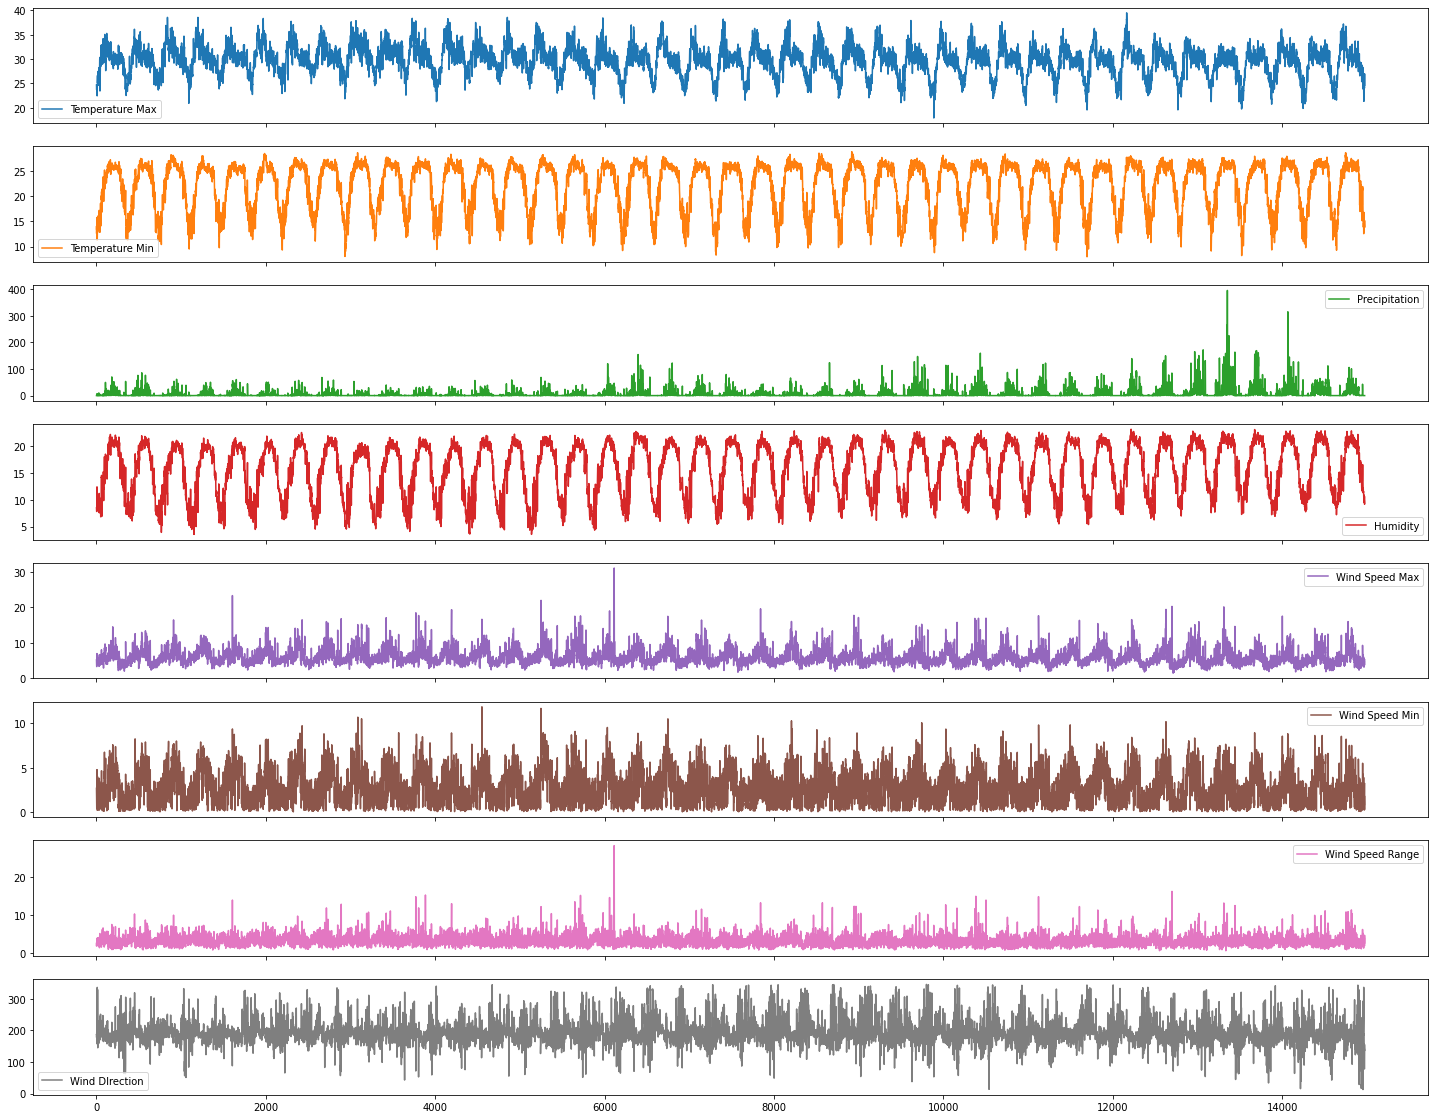

In [16]:
# Data Frequency
df.plot(subplots=True, figsize=(25,20))

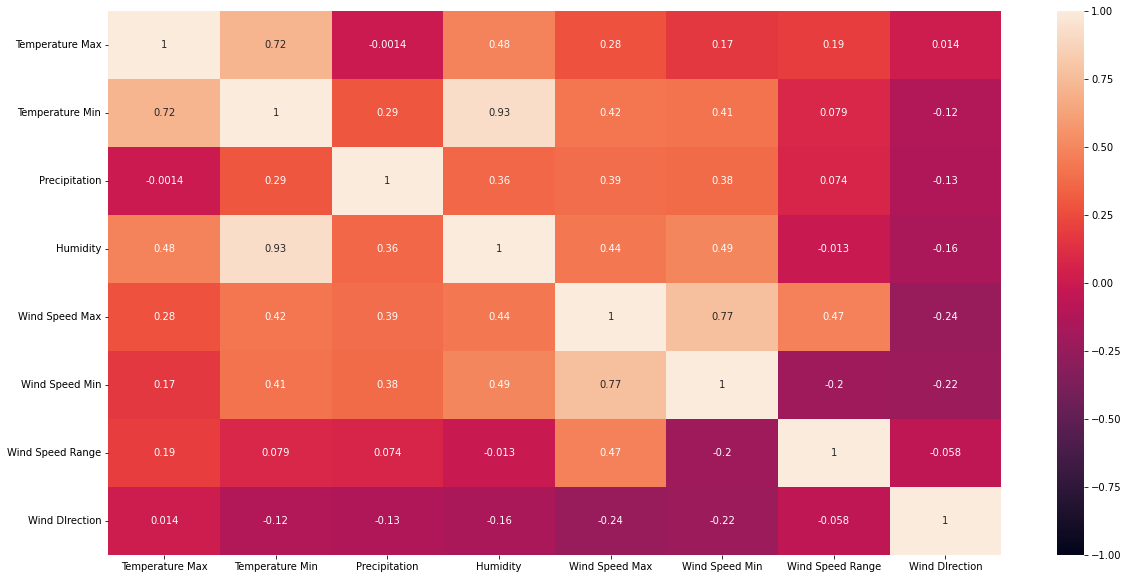

In [17]:
# Heatmap
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

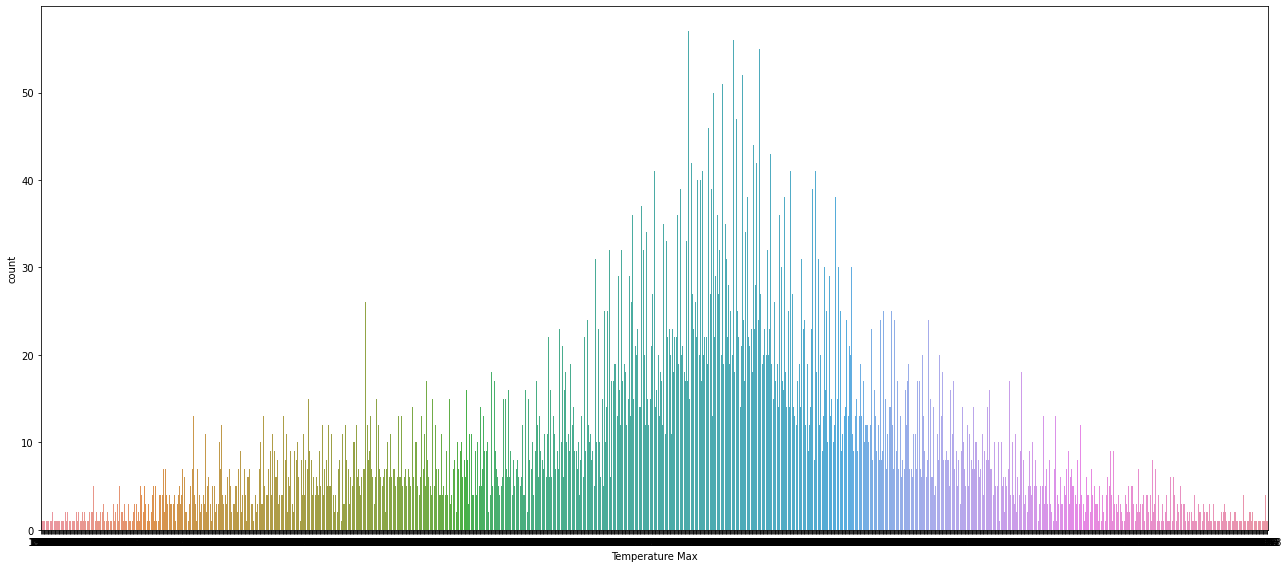

In [18]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=df['Temperature Max'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

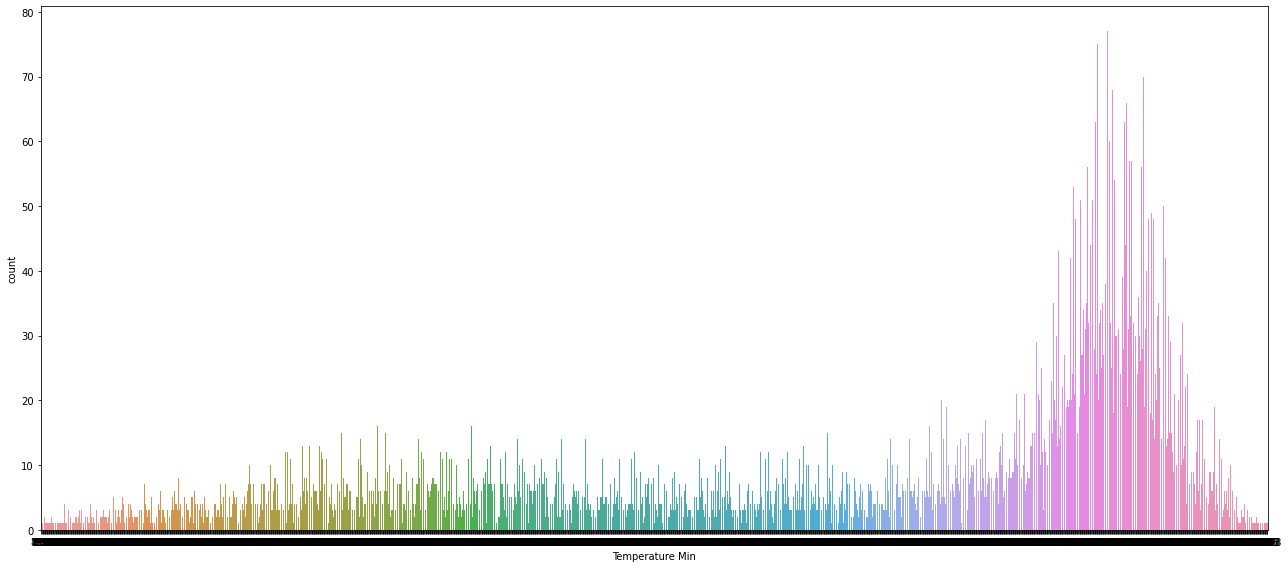

In [19]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=df['Temperature Min'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

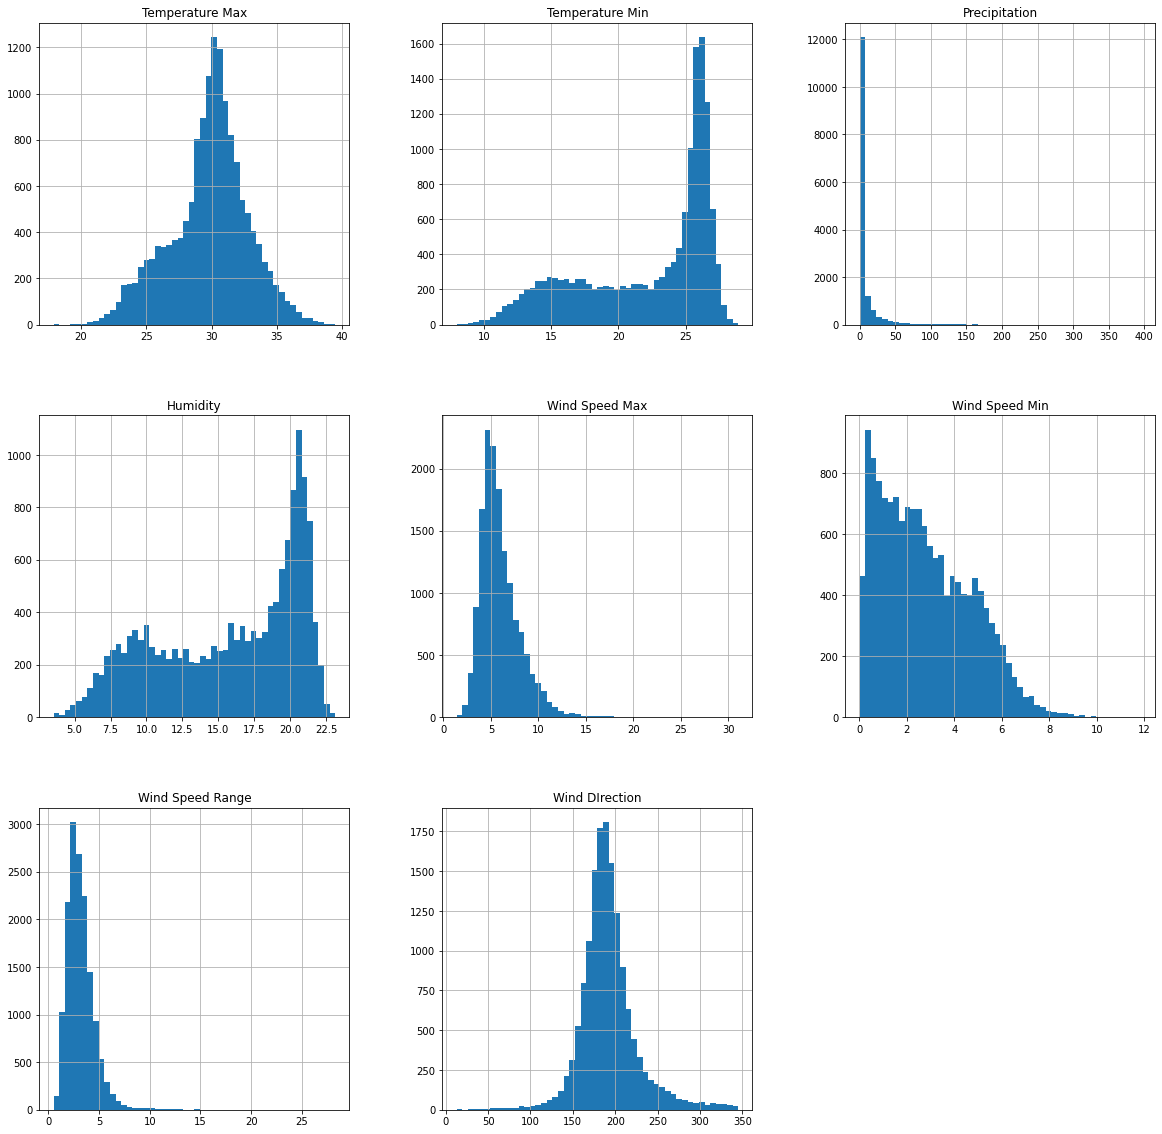

In [20]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

In [21]:
from prophet import Prophet

In [22]:
m = Prophet()

df_for=df[['Date','Humidity']]
df_for['Date']=pd.to_datetime(df_for['Date'])
df_for.rename(columns = {'Date':'ds'}, inplace = True)
df_for.rename(columns = {'Humidity':'y'}, inplace = True)
m.fit(df_for)

/tmp/ipykernel_1728/1791412780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for['Date']=pd.to_datetime(df_for['Date'])
/tmp/ipykernel_1728/1791412780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for.rename(columns = {'Date':'ds'}, inplace = True)
/tmp/ipykernel_1728/1791412780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for.rename(columns = {'Humidi

In [32]:
future = m.make_future_dataframe(periods=10957)
future.head(10)

,ds
0,1981-01-01
1,1981-01-02
2,1981-01-03
3,1981-01-04
4,1981-01-05
5,1981-01-06
6,1981-01-07
7,1981-01-08
8,1981-01-09
9,1981-01-10


In [33]:
future.tail(10)

,ds
25922,2051-12-22
25923,2051-12-23
25924,2051-12-24
25925,2051-12-25
25926,2051-12-26
25927,2051-12-27
25928,2051-12-28
25929,2051-12-29
25930,2051-12-30
25931,2051-12-31


In [34]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
25927,2051-12-27,11.916498,4.057246,18.994838
25928,2051-12-28,11.837701,3.848029,19.261321
25929,2051-12-29,11.779290,3.680984,19.042051
25930,2051-12-30,11.688574,3.625181,18.833851
25931,2051-12-31,11.639635,3.983528,18.631746


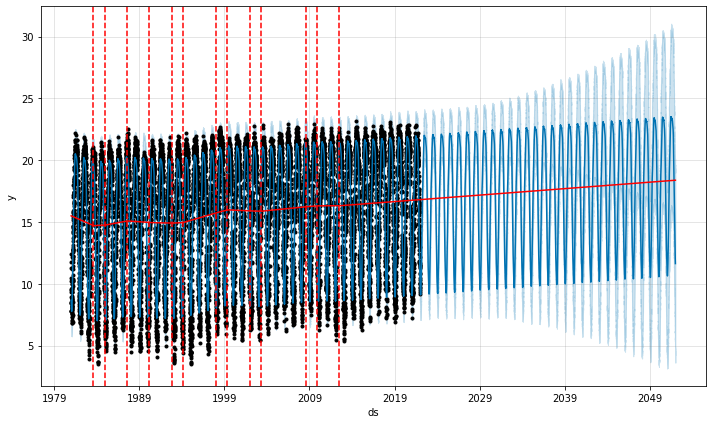

In [38]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)